In [1]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn | grep -v 'already satisfied'

# Importing necessary packages and libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree
from sklearn.metrics import roc_auc_score

# Data Exploration and Data Cleaning

Reading in test and train data

In [3]:
test_2018 = pd.read_csv('/content/Combined_Flights_large_test_2018.csv')
test_2019 = pd.read_csv('/content/Combined_Flights_large_test_2019.csv')
test_2020 = pd.read_csv('/content/Combined_Flights_large_test_2020.csv')
test_2021 = pd.read_csv('/content/Combined_Flights_large_test_2021.csv')
test_2022 = pd.read_csv('/content/Combined_Flights_large_test_2022.csv')

In [4]:
train_2018 = pd.read_csv('/content/Combined_Flights_large_train_2018.csv')
train_2019 = pd.read_csv('/content/Combined_Flights_large_train_2019.csv')
train_2020 = pd.read_csv('/content/Combined_Flights_large_train_2020.csv')
train_2021 = pd.read_csv('/content/Combined_Flights_large_train_2021.csv')
train_2022 = pd.read_csv('/content/Combined_Flights_large_train_2022.csv')

Concatenating test and train data

In [5]:
test = pd.concat([test_2018, test_2019, test_2020, test_2021, test_2022])
test.head(5)

,,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,...,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
2018-05-22,United Air Lines Inc.,EWR,SFO,830,367,2565,2018,2,5,22,2,...,CA,CA,6,California,91,0800-0859,1137,1100-1159,11,0.0
2018-01-12,Trans States Airlines,ORD,RIC,1050,123,642,2018,1,1,12,5,...,VA,VA,51,Virginia,38,1000-1059,1353,1300-1359,3,1.0
2018-07-23,SkyWest Airlines Inc.,IAH,SLC,1420,190,1195,2018,3,7,23,1,...,UT,UT,49,Utah,87,1400-1459,1630,1600-1659,5,0.0
2018-09-25,Comair Inc.,CLT,MLB,1135,105,490,2018,3,9,25,2,...,FL,FL,12,Florida,33,1100-1159,1320,1300-1359,2,0.0
2018-04-27,SkyWest Airlines Inc.,STL,PDX,1558,272,1708,2018,2,4,27,5,...,OR,OR,41,Oregon,92,1500-1559,1830,1800-1859,7,0.0


In [6]:
train = pd.concat([train_2018, train_2019, train_2020, train_2021, train_2022])
train.head(5)

,,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,...,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
2018-09-18,SkyWest Airlines Inc.,SEA,FAT,1745,135.0,748,2018,3,9,18,2,...,CA,CA,6,California,91,1700-1759,2000,2000-2059,3,0.0
2018-07-14,SkyWest Airlines Inc.,SHD,IAD,620,44.0,91,2018,3,7,14,6,...,DC,VA,51,Virginia,38,0600-0659,704,0700-0759,1,0.0
2018-11-25,Endeavor Air Inc.,ATL,LFT,1623,112.0,503,2018,4,11,25,7,...,LA,LA,22,Louisiana,72,1600-1659,1715,1700-1759,3,1.0
2018-02-16,Southwest Airlines Co.,TPA,MCI,835,175.0,1048,2018,1,2,16,5,...,MO,MO,29,Missouri,64,0800-0859,1030,1000-1059,5,0.0
2018-10-29,American Airlines Inc.,PHX,SNA,1357,78.0,338,2018,4,10,29,1,...,CA,CA,6,California,91,1300-1359,1515,1500-1559,2,0.0


Fixing columns in train and test datasets as they mixed after splitting the data

In [7]:
def reset_columns(test):
    # Storing the existing index values as regular columns
    test.reset_index(inplace=True)

    # Making indexes from 0 to ...
    test.index = range(len(test))

    # Additional operations on columns
    test["OriginAirportSeqID"] = test["OriginAirportSeqID"].str.cat(test["OriginCityMarketID"], sep=",")
    test["DestCityMarketID"] = test["DestCityMarketID"].str.cat(test["DestCityName"], sep=",")

    test.drop(["DestState", "OriginCityName"], axis=1, inplace=True)

    return test

test = reset_columns(test)

In [8]:
def reset_columns(train):
    # Storing the existing index values as regular columns
    train.reset_index(inplace=True)

    # Making indexes from 0 to ...
    train.index = range(len(train))

    # Additional operations on columns
    train["OriginAirportSeqID"] = train["OriginAirportSeqID"].str.cat(train["OriginCityMarketID"], sep=",")
    train["DestCityMarketID"] = train["DestCityMarketID"].str.cat(train["DestCityName"], sep=",")

    train.drop(["DestState", "OriginCityName"], axis=1, inplace=True)

    return train

train = reset_columns(train)

In [9]:
test.head(5)

,level_0,level_1,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,...,DestCityMarketID,DestCityName,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
0,2018-05-22,United Air Lines Inc.,EWR,SFO,830,367,2565,2018,2,5,...,"San Francisco, CA",CA,6,California,91,0800-0859,1137,1100-1159,11,0.0
1,2018-01-12,Trans States Airlines,ORD,RIC,1050,123,642,2018,1,1,...,"Richmond, VA",VA,51,Virginia,38,1000-1059,1353,1300-1359,3,1.0
2,2018-07-23,SkyWest Airlines Inc.,IAH,SLC,1420,190,1195,2018,3,7,...,"Salt Lake City, UT",UT,49,Utah,87,1400-1459,1630,1600-1659,5,0.0
3,2018-09-25,Comair Inc.,CLT,MLB,1135,105,490,2018,3,9,...,"Melbourne, FL",FL,12,Florida,33,1100-1159,1320,1300-1359,2,0.0
4,2018-04-27,SkyWest Airlines Inc.,STL,PDX,1558,272,1708,2018,2,4,...,"Portland, OR",OR,41,Oregon,92,1500-1559,1830,1800-1859,7,0.0


In [10]:
train.head(5)

,level_0,level_1,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,...,DestCityMarketID,DestCityName,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
0,2018-09-18,SkyWest Airlines Inc.,SEA,FAT,1745,135.0,748,2018,3,9,...,"Fresno, CA",CA,6,California,91,1700-1759,2000,2000-2059,3,0.0
1,2018-07-14,SkyWest Airlines Inc.,SHD,IAD,620,44.0,91,2018,3,7,...,"Washington, DC",DC,51,Virginia,38,0600-0659,704,0700-0759,1,0.0
2,2018-11-25,Endeavor Air Inc.,ATL,LFT,1623,112.0,503,2018,4,11,...,"Lafayette, LA",LA,22,Louisiana,72,1600-1659,1715,1700-1759,3,1.0
3,2018-02-16,Southwest Airlines Co.,TPA,MCI,835,175.0,1048,2018,1,2,...,"Kansas City, MO",MO,29,Missouri,64,0800-0859,1030,1000-1059,5,0.0
4,2018-10-29,American Airlines Inc.,PHX,SNA,1357,78.0,338,2018,4,10,...,"Santa Ana, CA",CA,6,California,91,1300-1359,1515,1500-1559,2,0.0


Renaming columns which are mixed after splitting the data

In [11]:
test.rename(columns={'level_0': 'FlightDate', 'level_1': 'Airline', 'FlightDate': 'Origin', 'Airline': 'Dest', 'Origin': 'CRSDepTime', 'Dest': 'CRSElapsedTime', 'CRSDepTime': 'Distance', 'CRSElapsedTime': 'Year', 'Distance': 'Quarter', 'Year': 'Month', 'Quarter': 'DayofMonth', 'Month': 'DayOfWeek', 'DayofMonth': 'Marketing_Airline_Network', 'DayOfWeek': 'Operated_or_Branded_Code_Share_Partners', 'Marketing_Airline_Network': 'DOT_ID_Marketing_Airline', 'Operated_or_Branded_Code_Share_Partners': 'IATA_Code_Marketing_Airline', 'DOT_ID_Marketing_Airline': 'Flight_Number_Marketing_Airline', 'IATA_Code_Marketing_Airline': 'Operating_Airline', 'Flight_Number_Marketing_Airline': 'DOT_ID_Operating_Airline', 'Operating_Airline': 'IATA_Code_Operating_Airline', 'DOT_ID_Operating_Airline': 'Tail_Number', 'IATA_Code_Operating_Airline': 'Flight_Number_Operating_Airline', 'Tail_Number': 'OriginAirportID', 'Flight_Number_Operating_Airline': 'OriginAirportSeqID', 'OriginAirportID': 'OriginCityMarketID', 'OriginAirportSeqID': 'OriginCityName', 'OriginCityMarketID': 'OriginState', 'OriginState': 'OriginStateFips', 'OriginStateFips': 'OriginStateName', 'OriginStateName': 'OriginWac', 'OriginWac': 'DestAirportID', 'DestAirportID': 'DestAirportSeqID', 'DestAirportSeqID': 'DestCityMarketID', 'DestCityMarketID': 'DestCityName', 'DestCityName': 'DestState'}, inplace=True)

In [12]:
train.rename(columns={'level_0': 'FlightDate', 'level_1': 'Airline', 'FlightDate': 'Origin', 'Airline': 'Dest', 'Origin': 'CRSDepTime', 'Dest': 'CRSElapsedTime', 'CRSDepTime': 'Distance', 'CRSElapsedTime': 'Year', 'Distance': 'Quarter', 'Year': 'Month', 'Quarter': 'DayofMonth', 'Month': 'DayOfWeek', 'DayofMonth': 'Marketing_Airline_Network', 'DayOfWeek': 'Operated_or_Branded_Code_Share_Partners', 'Marketing_Airline_Network': 'DOT_ID_Marketing_Airline', 'Operated_or_Branded_Code_Share_Partners': 'IATA_Code_Marketing_Airline', 'DOT_ID_Marketing_Airline': 'Flight_Number_Marketing_Airline', 'IATA_Code_Marketing_Airline': 'Operating_Airline', 'Flight_Number_Marketing_Airline': 'DOT_ID_Operating_Airline', 'Operating_Airline': 'IATA_Code_Operating_Airline', 'DOT_ID_Operating_Airline': 'Tail_Number', 'IATA_Code_Operating_Airline': 'Flight_Number_Operating_Airline', 'Tail_Number': 'OriginAirportID', 'Flight_Number_Operating_Airline': 'OriginAirportSeqID', 'OriginAirportID': 'OriginCityMarketID', 'OriginAirportSeqID': 'OriginCityName', 'OriginCityMarketID': 'OriginState', 'OriginState': 'OriginStateFips', 'OriginStateFips': 'OriginStateName', 'OriginStateName': 'OriginWac', 'OriginWac': 'DestAirportID', 'DestAirportID': 'DestAirportSeqID', 'DestAirportSeqID': 'DestCityMarketID', 'DestCityMarketID': 'DestCityName', 'DestCityName': 'DestState'}, inplace=True)

In [13]:
train.head(5)

,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,...,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
0,2018-09-18,SkyWest Airlines Inc.,SEA,FAT,1745,135.0,748,2018,3,9,...,"Fresno, CA",CA,6,California,91,1700-1759,2000,2000-2059,3,0.0
1,2018-07-14,SkyWest Airlines Inc.,SHD,IAD,620,44.0,91,2018,3,7,...,"Washington, DC",DC,51,Virginia,38,0600-0659,704,0700-0759,1,0.0
2,2018-11-25,Endeavor Air Inc.,ATL,LFT,1623,112.0,503,2018,4,11,...,"Lafayette, LA",LA,22,Louisiana,72,1600-1659,1715,1700-1759,3,1.0
3,2018-02-16,Southwest Airlines Co.,TPA,MCI,835,175.0,1048,2018,1,2,...,"Kansas City, MO",MO,29,Missouri,64,0800-0859,1030,1000-1059,5,0.0
4,2018-10-29,American Airlines Inc.,PHX,SNA,1357,78.0,338,2018,4,10,...,"Santa Ana, CA",CA,6,California,91,1300-1359,1515,1500-1559,2,0.0


In [14]:
test.head(5)

,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,...,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
0,2018-05-22,United Air Lines Inc.,EWR,SFO,830,367,2565,2018,2,5,...,"San Francisco, CA",CA,6,California,91,0800-0859,1137,1100-1159,11,0.0
1,2018-01-12,Trans States Airlines,ORD,RIC,1050,123,642,2018,1,1,...,"Richmond, VA",VA,51,Virginia,38,1000-1059,1353,1300-1359,3,1.0
2,2018-07-23,SkyWest Airlines Inc.,IAH,SLC,1420,190,1195,2018,3,7,...,"Salt Lake City, UT",UT,49,Utah,87,1400-1459,1630,1600-1659,5,0.0
3,2018-09-25,Comair Inc.,CLT,MLB,1135,105,490,2018,3,9,...,"Melbourne, FL",FL,12,Florida,33,1100-1159,1320,1300-1359,2,0.0
4,2018-04-27,SkyWest Airlines Inc.,STL,PDX,1558,272,1708,2018,2,4,...,"Portland, OR",OR,41,Oregon,92,1500-1559,1830,1800-1859,7,0.0


Visualising distribution of disruptions

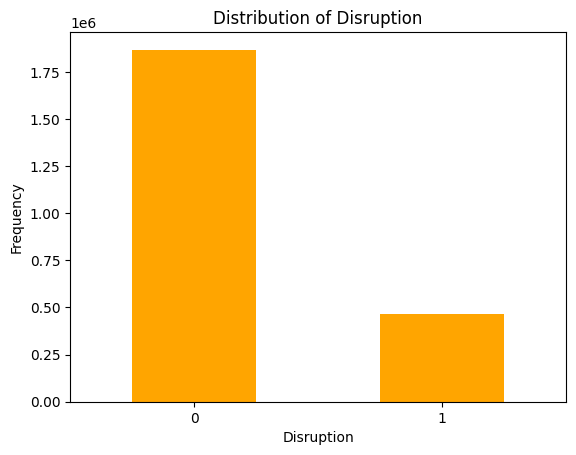

In [15]:
counts = train['Disruption'].value_counts()
counts.plot(kind='bar', color='orange')
plt.title('Distribution of Disruption')
plt.xlabel('Disruption')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()

Visualising disruptions grouped by years

<Figure size 1000x600 with 0 Axes>

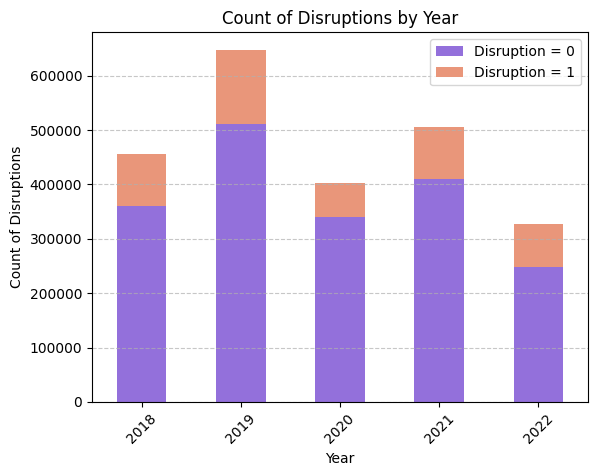

In [16]:
# Grouping data by 'year' and counting the number of disruptions for each year
disruption_counts = train.groupby(['Year', 'Disruption']).size().unstack(fill_value=0)

# Creating the plot
plt.figure(figsize=(10, 6))
disruption_counts.plot(kind='bar', stacked=True, color=['mediumpurple', 'DarkSalmon'])
plt.title('Count of Disruptions by Year')
plt.xlabel('Year')
plt.ylabel('Count of Disruptions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(['Disruption = 0', 'Disruption = 1'])
plt.show()

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335500 entries, 0 to 2335499
Data columns (total 43 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   CRSDepTime                               int64  
 5   CRSElapsedTime                           float64
 6   Distance                                 int64  
 7   Year                                     int64  
 8   Quarter                                  int64  
 9   Month                                    int64  
 10  DayofMonth                               int64  
 11  DayOfWeek                                int64  
 12  Marketing_Airline_Network                object 
 13  Operated_or_Branded_Code_Share_Partners  object 
 14  DOT_ID_Marketing_A

In [18]:
train.shape[0]

2335500

In [19]:
train.shape[1]

43

Exploring missing values in train data

In [20]:
print(train.isnull().values.any())

True


In [21]:
print(train.isnull().sum())

FlightDate                                     0
Airline                                        0
Origin                                         0
Dest                                           0
CRSDepTime                                     0
CRSElapsedTime                                 1
Distance                                       0
Year                                           0
Quarter                                        0
Month                                          0
DayofMonth                                     0
DayOfWeek                                      0
Marketing_Airline_Network                      0
Operated_or_Branded_Code_Share_Partners        0
DOT_ID_Marketing_Airline                       0
IATA_Code_Marketing_Airline                    0
Flight_Number_Marketing_Airline                0
Operating_Airline                              0
DOT_ID_Operating_Airline                       0
IATA_Code_Operating_Airline                    0
Tail_Number         

Dropping rows with missing values from the train data


In [22]:
train = train.dropna(subset = ['Disruption'])
train = train.dropna(subset = ['Tail_Number'])
train = train.dropna(subset = ['CRSElapsedTime'])

In [23]:
train.nunique()

FlightDate                                 1673
Airline                                      28
Origin                                      387
Dest                                        387
CRSDepTime                                 1393
CRSElapsedTime                              643
Distance                                   1719
Year                                          5
Quarter                                       4
Month                                        12
DayofMonth                                   31
DayOfWeek                                     7
Marketing_Airline_Network                    11
Operated_or_Branded_Code_Share_Partners      16
DOT_ID_Marketing_Airline                     11
IATA_Code_Marketing_Airline                  11
Flight_Number_Marketing_Airline            7163
Operating_Airline                            28
DOT_ID_Operating_Airline                     28
IATA_Code_Operating_Airline                  28
Tail_Number                             

Changing object data types to numeric for correlation matrix heatmap

In [24]:
# Applying LabelEncoder to columns with object or category dtype
train = train.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' or col.dtype.name == 'category' else col)

Visualising collinearity between each variable in the train dataset by plotting a correlation matrix heatmap

<Axes: >

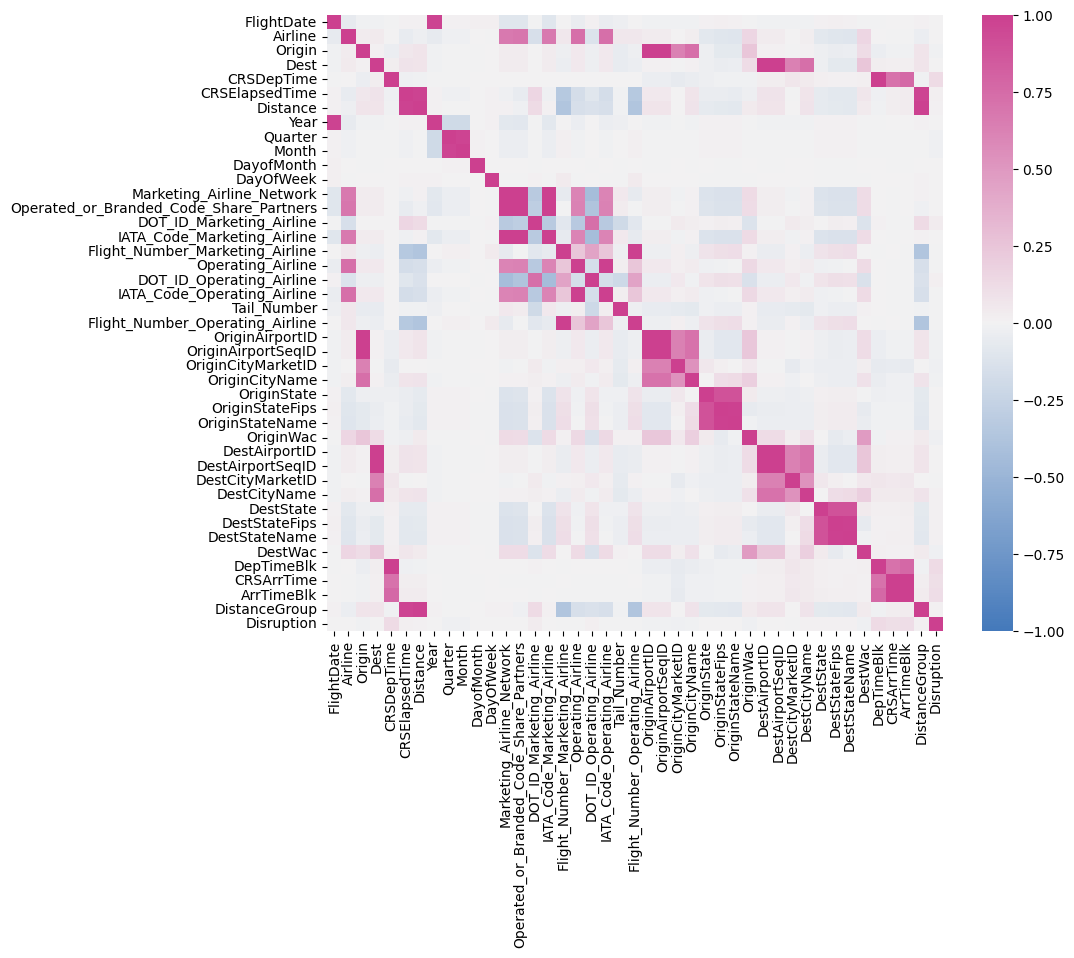

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(250, 340, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Visualising collinearity between variables in the train dataset by plotting a correlation matrix heatmap with numeric measurements

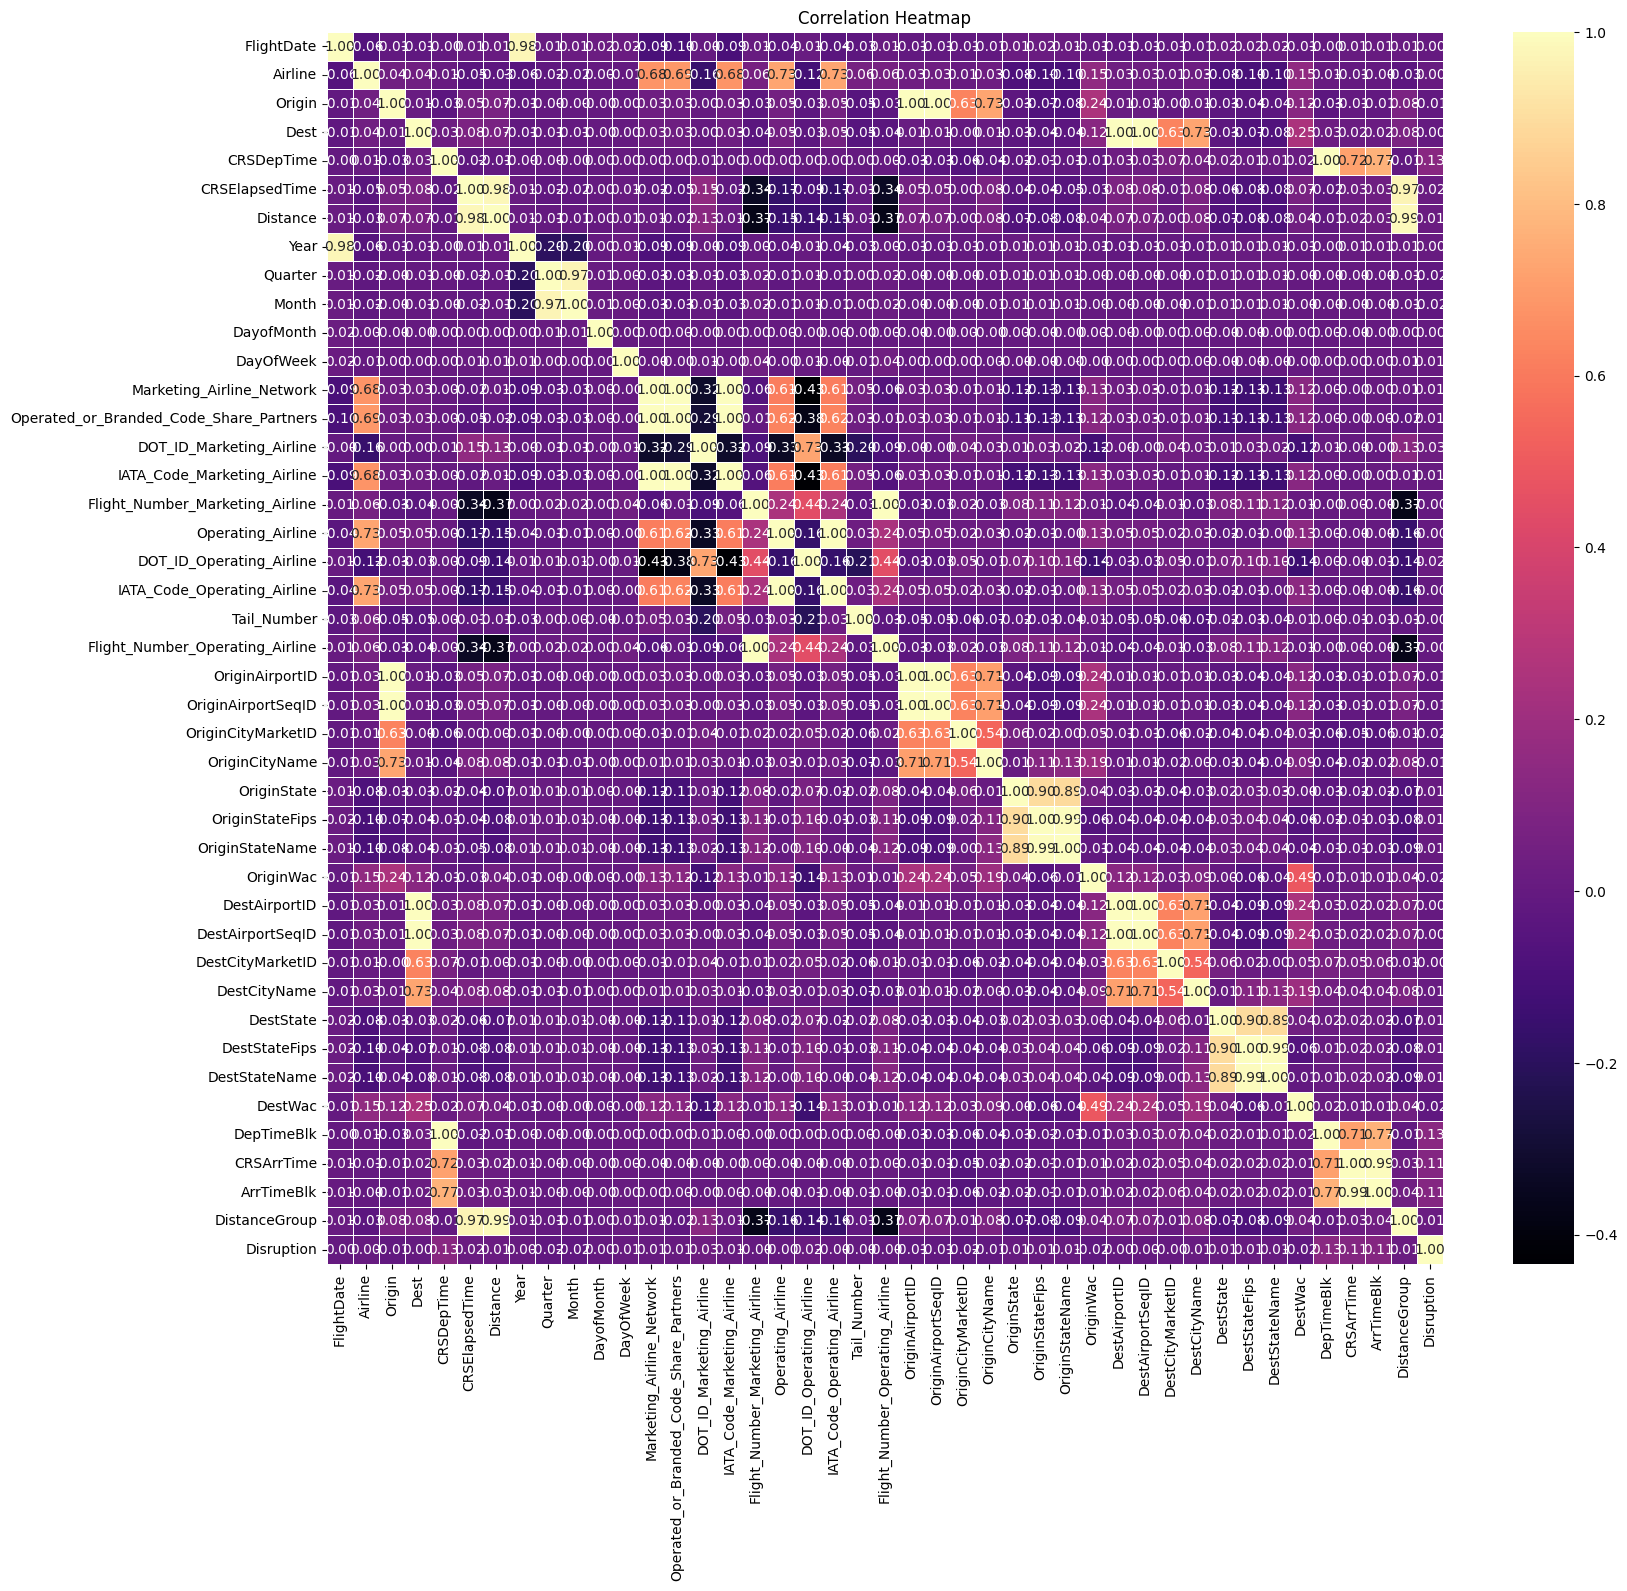

In [26]:
# Calculating the correlation matrix
correlation_matrix = train.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection

Dropping features based on correlation matrix results, duplicates, missing values, description of the data

In [27]:
columns_to_drop = [0, 2, 3, 5, 7, 8, 10] + list(range(12, 20)) + list(range(21, 25))+ list(range(26, 33)) + list(range(34, 42))
train = train.drop(train.columns[columns_to_drop], axis=1)

In [28]:
train.head()

,Airline,CRSDepTime,Distance,Month,DayOfWeek,Tail_Number,OriginCityName,DestCityName,Disruption
0,22,1745,748,9,2,2362,324,123,0.0
1,22,620,91,7,6,6592,339,361,0.0
2,11,1623,503,11,7,5937,19,187,1.0
3,23,835,1048,2,5,6726,345,175,0.0
4,3,1357,338,10,1,6663,269,314,0.0


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314051 entries, 0 to 2335499
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Airline         int64  
 1   CRSDepTime      int64  
 2   Distance        int64  
 3   Month           int64  
 4   DayOfWeek       int64  
 5   Tail_Number     int64  
 6   OriginCityName  int64  
 7   DestCityName    int64  
 8   Disruption      float64
dtypes: float64(1), int64(8)
memory usage: 176.5 MB


In [30]:
print(train.isnull().sum())

Airline           0
CRSDepTime        0
Distance          0
Month             0
DayOfWeek         0
Tail_Number       0
OriginCityName    0
DestCityName      0
Disruption        0
dtype: int64


Plotting correlation matrix heatmap for selected features

<Axes: >

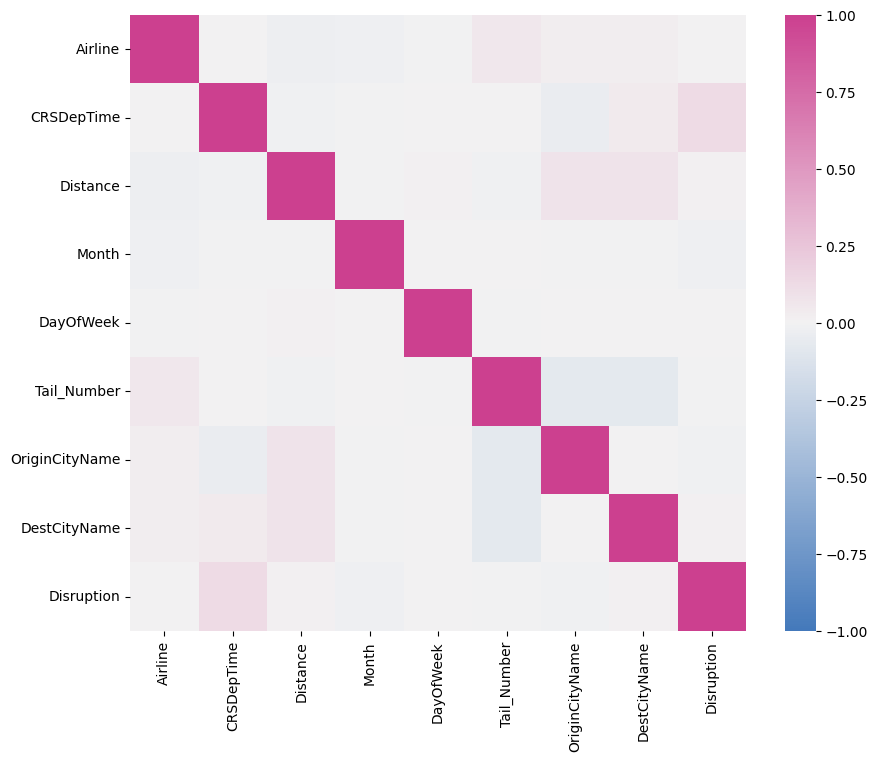

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(250, 340, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Plotting correlation matrix heatmap with numeric measurements for selected features

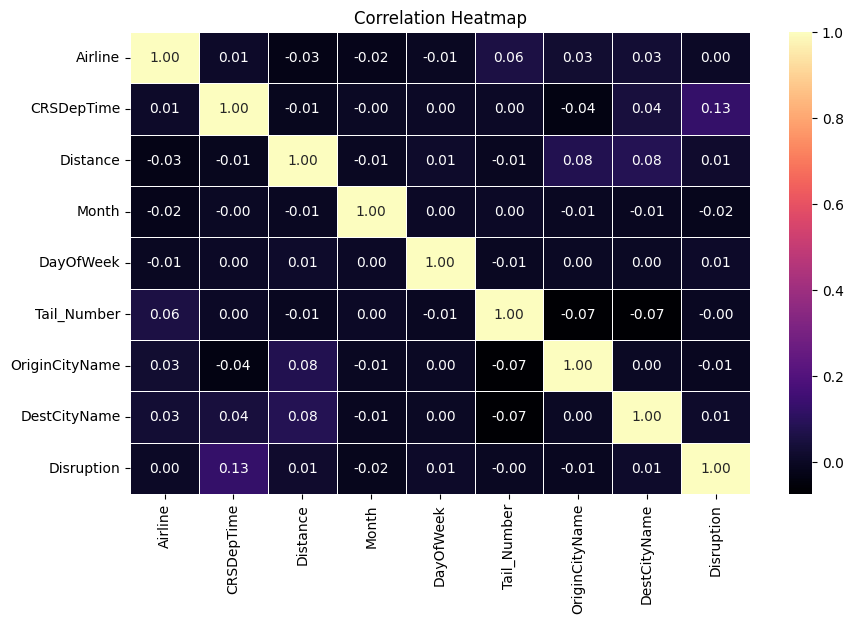

In [32]:
# Calculating the correlation matrix
correlation_matrix = train.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression Model

Fitting a logistic regression model to train data

In [33]:
X_train = train.filter(['Airline', 'CRSDepTime', 'DayOfWeek', 'Month', 'Tail_Number', 'Distance', 'OriginCityName', 'DestCityName'])
y_train = train.filter(['Disruption'])

In [34]:
logistic_model = LogisticRegression(max_iter=1000)

# Training the model on the training data
logistic = logistic_model.fit(X_train, y_train)
logistic

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

Making predictions using a logistic regression model for train data

In [35]:
# Making predictions on the train data
logistic_predict = logistic_model.predict(X_train).round()

# Displaying the predictions
print("Predictions on train data:")
logistic_predict

Predictions on train data:


array([0., 0., 0., ..., 0., 0., 0.])

Calculating accuracy, precision, recall and f1 score to assess the model performance

In [36]:
# Calculating metrics
logistic_accuracy = accuracy_score(y_train, logistic_predict)
logistic_precision = precision_score(y_train, logistic_predict)
logistic_recall = recall_score(y_train, logistic_predict)
logistic_f1 = f1_score(y_train, logistic_predict)

# Printing the results
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8070016607239858
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


Performing cross validation to check how powerful the model is

In [37]:
logistic_cross_val_scores = cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy')

# Printing cross-validation scores
print("Cross-validation scores:", logistic_cross_val_scores)
print("Mean accuracy:", np.mean(logistic_cross_val_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validation scores: [0.80700113 0.80700287 0.80700287 0.80700071 0.80699639]
Mean accuracy: 0.8070007964386552


In [39]:
K = 10

scores = cross_val_score(
    logistic, X_train, y_train,
    scoring = 'neg_mean_squared_error', cv = K)
logistic_rmse_scores = np.sqrt(-scores)
logistic_rmse_scores

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([0.43931589, 0.43931192, 0.43931192, 0.43931684, 0.43931684,
       0.43931684, 0.43931684, 0.43931684, 0.43931684, 0.43931684])

Plotting a confusion matrix to prove and visualise the accuracy of the model

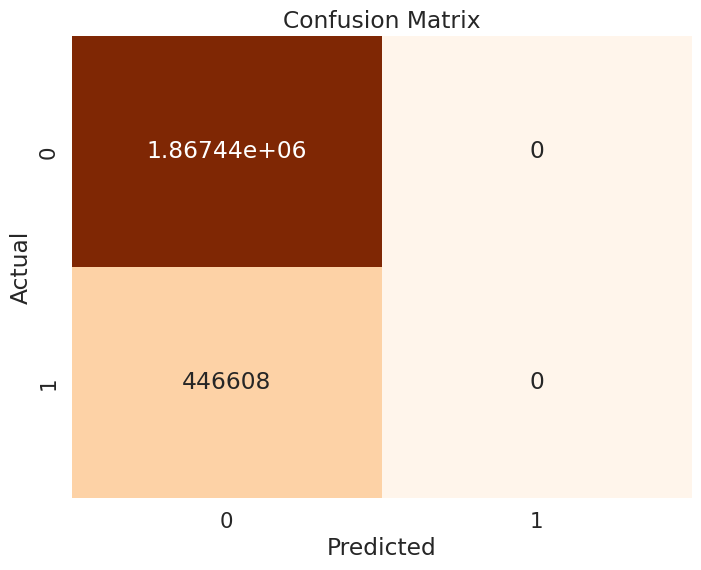

In [40]:
# Creating the confusion matrix
logistic_conf_matrix = confusion_matrix(y_train, logistic_predict)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(logistic_conf_matrix, annot=True, fmt='g', cmap='Oranges', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree

Fitting a decision tree model to train data

In [41]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=2021, min_impurity_decrease=0.001)

# Training the decision tree
tree = tree_model.fit(X_train, y_train)

Visualising decision tree

[Text(0.5, 0.875, 'CRSDepTime <= 1221.5\ngini = 0.5\nsamples = 2314051\nvalue = [1157025.5, 1157025.5]\nclass = Disruption'),
 Text(0.25, 0.625, 'CRSDepTime <= 745.5\ngini = 0.483\nsamples = 1022243\nvalue = [543482.773, 375806.343]\nclass = No Disruption'),
 Text(0.125, 0.375, 'gini = 0.457\nsamples = 352441\nvalue = [193109.888, 105599.354]\nclass = No Disruption'),
 Text(0.375, 0.375, 'gini = 0.492\nsamples = 669802\nvalue = [350372.885, 270206.988]\nclass = No Disruption'),
 Text(0.75, 0.625, 'Month <= 8.5\ngini = 0.493\nsamples = 1291808\nvalue = [613542.727, 781219.157]\nclass = Disruption'),
 Text(0.625, 0.375, 'Month <= 5.5\ngini = 0.487\nsamples = 886822\nvalue = [412446.487, 572885.759]\nclass = Disruption'),
 Text(0.5, 0.125, 'gini = 0.496\nsamples = 559342\nvalue = [268895.977, 324725.592]\nclass = Disruption'),
 Text(0.75, 0.125, 'gini = 0.464\nsamples = 327480\nvalue = [143550.51, 248160.166]\nclass = Disruption'),
 Text(0.875, 0.375, 'gini = 0.5\nsamples = 404986\nvalue 

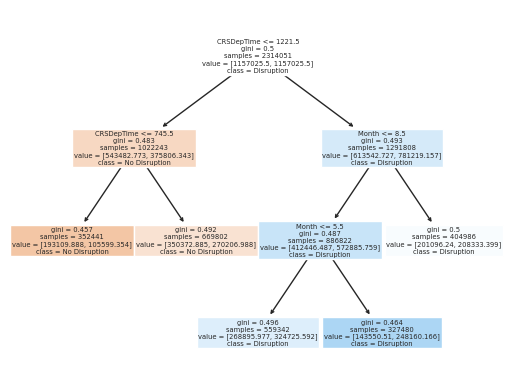

In [42]:
# Visualising the model
sklearn.tree.plot_tree(tree,
    feature_names=X_train.columns,
    class_names=['No Disruption', 'Disruption'],
    filled=True)

Making predictions using a decision tree model for train data

In [43]:
# Making predictions on the train data
tree_predict = tree.predict(X_train).round()

# Displaying the predictions
print("Predictions on train data:")
print(tree_predict)

Predictions on train data:
[1. 0. 1. ... 1. 1. 1.]


Calculating accuracy, precision, recall and f1 score to assess the model performance

In [44]:
# Calculating metrics
tree_accuracy = accuracy_score(y_train, tree_predict)
tree_precision = precision_score(y_train, tree_predict)
tree_recall = recall_score(y_train, tree_predict)
tree_f1 = f1_score(y_train, tree_predict)

# Printing the results
print("Accuracy:", tree_accuracy)
print("Precision:", tree_precision)
print("Recall:", tree_recall)
print("F1 Score:", tree_f1)

Accuracy: 0.509379871057293
Precision: 0.2334309742624291
Recall: 0.6751961451653351
F1 Score: 0.3469227158516719


Performing cross-validation to check how powerful the model is

In [45]:
tree_cross_val_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

# Printing cross-validation scores
print("Cross-validation scores:", tree_cross_val_scores)
print("Mean accuracy:", np.mean(tree_cross_val_scores))

Cross-validation scores: [0.54598097 0.54722456 0.49660768 0.615851   0.51639118]
Mean accuracy: 0.5444110775562443


In [46]:
K = 10

scores = cross_val_score(
    tree, X_train, y_train,
    scoring = 'neg_mean_squared_error', cv = K)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.67224674, 0.67346847, 0.67905666, 0.69786551, 0.70138935,
       0.71802157, 0.70453071, 0.69955089, 0.70147868, 0.69385995])

Plotting a confusion matrix to prove and visualise the accuracy of the model

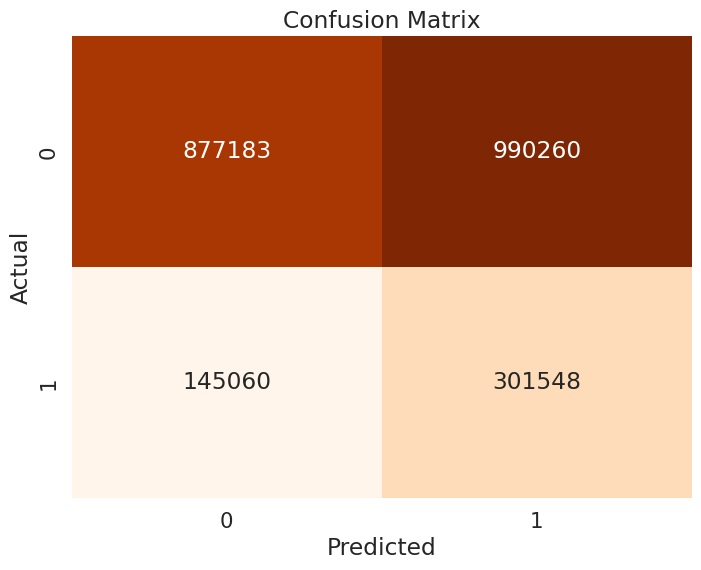

In [47]:
# Creating the confusion matrix
tree_conf_matrix = confusion_matrix(y_train, tree_predict)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(tree_conf_matrix, annot=True, fmt='g', cmap='Oranges', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

Fitting a random forest model to train data

In [48]:
# Initialising the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators = 10, random_state = 1234)

# Fitting the Random Forest model to the train data
forest = random_forest_model.fit(X_train, y_train)
forest

<ipython-input-48-bdc9090f0b60>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest = random_forest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=1234)

Making predictions using a random forest model for train data

In [49]:
# Making predictions on the train data
forest_predict = forest.predict(X_train).round()

# Displaying the predictions
print("Predictions on train data:")
print(forest_predict)

Predictions on train data:
[0. 0. 1. ... 0. 1. 0.]


Calculating accuracy, precision, recall and f1 score to assess the model performance

In [50]:
# Calculating metrics
forest_accuracy = accuracy_score(y_train, forest_predict)
forest_precision = precision_score(y_train, forest_predict)
forest_recall = recall_score(y_train, forest_predict)
forest_f1 = f1_score(y_train, forest_predict)

# Printing the results
print("Accuracy:", forest_accuracy)
print("Precision:", forest_precision)
print("Recall:", forest_recall)
print("F1 Score:", forest_f1)

Accuracy: 0.9746569976201908
Precision: 0.9959628861656623
Recall: 0.8722235159244797
F1 Score: 0.9299952609972916


Performing cross-validation to check how powerful the model is

In [51]:
forest_cross_val_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='accuracy')

# Printing cross-validation scores
print("Cross-validation scores:", forest_cross_val_scores)
print("Mean accuracy:", np.mean(forest_cross_val_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross-validation scores: [0.78820296 0.78876429 0.79094013 0.79318727 0.78858279]
Mean accuracy: 0.7899354861809555


In [52]:
K = 10

scores = cross_val_score(
    forest, X_train, y_train,
    scoring = 'neg_mean_squared_error', cv = K)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([0.461325  , 0.46043523, 0.46165842, 0.46178009, 0.45810643,
       0.45596005, 0.4542699 , 0.45567089, 0.45950513, 0.46626429])

Plotting confusion matrix to prove and visualise the accuracy of the model

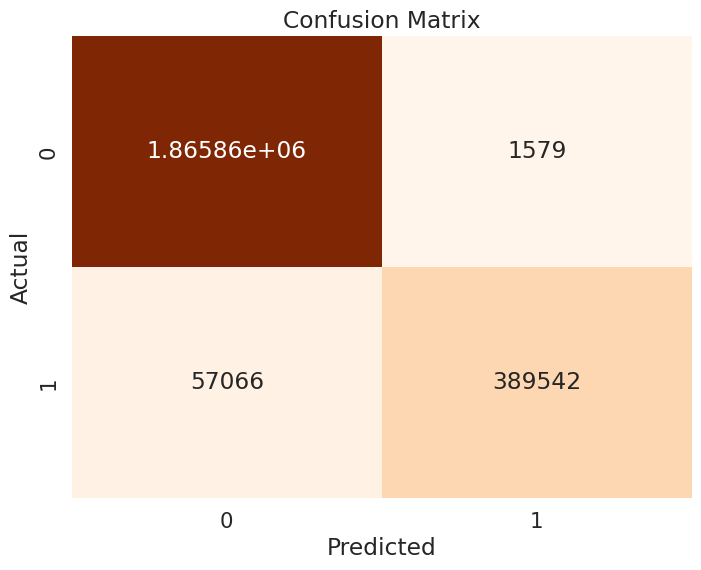

In [53]:
# Creating the confusion matrix
forest_conf_matrix = confusion_matrix(y_train, forest_predict)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(forest_conf_matrix, annot=True, fmt='g', cmap='Oranges', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Calculating AUC score to evaluate the performance of the model

In [54]:
# Computing the AUC score
auc_score = roc_auc_score(y_train, forest_predict)

print("Area under the ROC curve (AUC):", auc_score)

Area under the ROC curve (AUC): 0.9356889873609416


Based on accuracy, cross validation, confusion matrices and AUC score the random forest model is the best among others (decision tree and logistic regression). So random forest is the final model

# Preparing test data

In [55]:
print(test.isnull().values.any())

True


In [56]:
print(test.isnull().sum())

FlightDate                                    0
Airline                                       0
Origin                                        0
Dest                                          0
CRSDepTime                                    0
CRSElapsedTime                                0
Distance                                      0
Year                                          0
Quarter                                       0
Month                                         0
DayofMonth                                    0
DayOfWeek                                     0
Marketing_Airline_Network                     0
Operated_or_Branded_Code_Share_Partners       0
DOT_ID_Marketing_Airline                      0
IATA_Code_Marketing_Airline                   0
Flight_Number_Marketing_Airline               0
Operating_Airline                             0
DOT_ID_Operating_Airline                      0
IATA_Code_Operating_Airline                   0
Tail_Number                             

Changing object data types to numeric

In [57]:
# Applying LabelEncoder only to columns with object or category dtype
test = test.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' or col.dtype.name == 'category' else col)

Dropping rows with missing values from the test data

In [58]:
test = test.dropna(subset = ['Disruption'])
test = test.dropna(subset = ['Tail_Number'])

Dropping features based on correlation matrix results, duplicates, missing values, description of the data

In [59]:
columns_to_drop = [0, 2, 3, 5, 7, 8, 10] + list(range(12, 20)) + list(range(21, 25)) + list(range(26, 33)) + list(range(34, 42))
test = test.drop(test.columns[columns_to_drop], axis=1)

In [60]:
test.head()

,Airline,CRSDepTime,Distance,Month,DayOfWeek,Tail_Number,OriginCityName,DestCityName,Disruption
0,26,830,2565,5,2,4534,243,309,0.0
1,25,1050,642,1,5,1170,65,291,1.0
2,22,1420,1195,7,1,4821,155,305,0.0
3,6,1135,490,9,2,1035,61,217,0.0
4,22,1558,1708,4,5,753,336,276,0.0


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583858 entries, 0 to 583872
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Airline         583858 non-null  int64  
 1   CRSDepTime      583858 non-null  int64  
 2   Distance        583858 non-null  int64  
 3   Month           583858 non-null  int64  
 4   DayOfWeek       583858 non-null  int64  
 5   Tail_Number     583858 non-null  int64  
 6   OriginCityName  583858 non-null  int64  
 7   DestCityName    583858 non-null  int64  
 8   Disruption      583858 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 44.5 MB


In [63]:
print(test.isnull().sum())

Airline           0
CRSDepTime        0
Distance          0
Month             0
DayOfWeek         0
Tail_Number       0
OriginCityName    0
DestCityName      0
Disruption        0
dtype: int64


# Testing the final model and Marking Predictions

Fitting the random forest model to test data

In [64]:
X_test = test.filter(['Airline', 'CRSDepTime', 'DayOfWeek', 'Month', 'Tail_Number', 'Distance', 'OriginCityName', 'DestCityName'])
y_test = test.filter(['Disruption'])

Making predictions using random forest model for test data

In [65]:
test_predict = forest.predict(X_test).round()

# Displaying the predictions
print("Predictions on train data:")
print(test_predict)

Predictions on train data:
[0. 1. 0. ... 0. 0. 0.]


Calculating accuracy, precision, recall and f1 score to assess the model performance and compare the test and train datasets results

In [66]:
# Calculating metrics
test_accuracy = accuracy_score(y_test, test_predict)
test_precision = precision_score(y_test, test_predict)
test_recall = recall_score(y_test, test_predict)
test_f1 = f1_score(y_test, test_predict)

# Printing the results
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

Accuracy: 0.7834644725258539
Precision: 0.3396646622760969
Recall: 0.09175999381161526
F1 Score: 0.14448700077142743


Plotting a confusion matrix to prove and visualise the accuracy of the model on test data

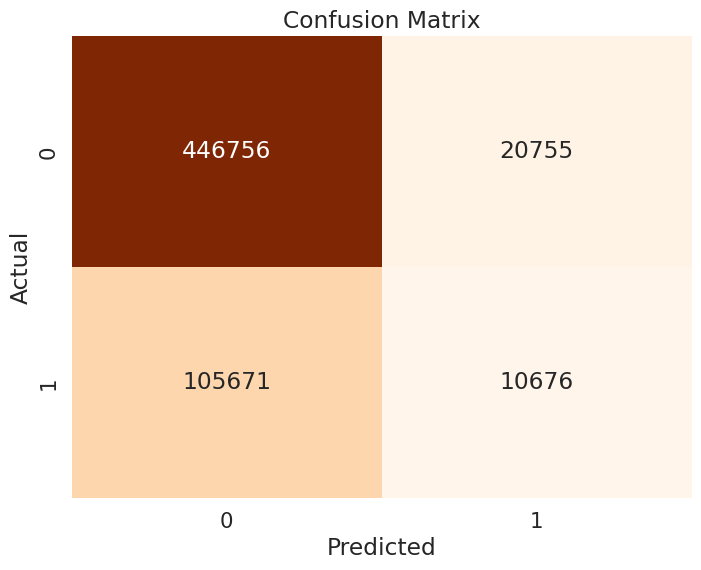

In [67]:
# Creating the confusion matrix
test_conf_matrix = confusion_matrix(y_test, test_predict)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Oranges', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()